<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#modifications 21-09-202
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-df75fd59-5d48-944c-6b37-bbd3f9be5f05)


In [3]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import *
from PIL import Image, ImageOps
%matplotlib inline


In [4]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [25]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [6]:
input_shape = 784

In [27]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  tmp_row = np.asfarray(rows.split(',')[1:])
  tmp_row[tmp_row < 20.0] = 0.0
  X_train.append(tmp_row.reshape([28,28]))
  y_train.append(int(rows.split(',')[0]))

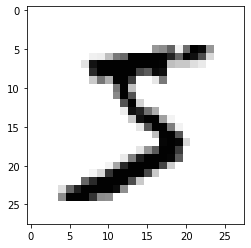

In [28]:
#print(X_train[0])
plt.pyplot.imshow(X_train[0],cmap='Greys',interpolation='None')

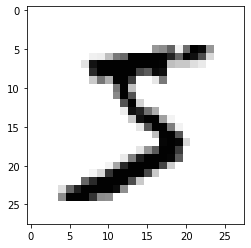

In [29]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 + 0.01#scaling input data to be between 0 and 1
y_train = np.array(y_train)
plt.pyplot.imshow(X_train[0],cmap='Greys',interpolation='None')

In [95]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1) ,padding='same'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(Dropout(0.10))
model.add(MaxPool2D(pool_size=(3,3),padding='same'))
model.add(Flatten())
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)              

In [96]:
print(X_train.shape)

(60000, 28, 28)


In [97]:
model.fit(X_train[...,np.newaxis],y_train,verbose=1,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1892 - accuracy: 0.9398
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0526 - accuracy: 0.9842
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0375 - accuracy: 0.9887
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0243 - accuracy: 0.9924
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0198 - accuracy: 0.9941
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 8/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 9/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 10/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0109 - accura

In [53]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [101]:
model.save("//content/gdrive/My Drive/MNIST/trained_model")

INFO:tensorflow:Assets written to: //content/gdrive/My Drive/MNIST/trained_model/assets


In [55]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  tmp_row = np.asfarray(rows.split(',')[1:])
  tmp_row[tmp_row < 20.0] = 0.0
  X_test.append(np.asfarray(tmp_row).reshape([28,28]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 + 0.01 #scaling test data
y_test = np.array(y_test)

In [98]:
#Evaluate the trained model on test data
model.evaluate(X_test[...,np.newaxis],y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9940


[0.027906689792871475, 0.9940000176429749]

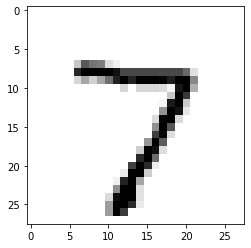

In [99]:
#Check a couple of images and their corresponding labels.
plt.pyplot.imshow(X_test[0],cmap='Greys',interpolation='None')
#print(X_test[1458])

In [100]:
pred_image = X_test[0]
print(pred_image.shape)
#pred_image[np.newaxis,...,np.newaxis]
np.argmax(model.predict(pred_image[np.newaxis,...,np.newaxis]))

(28, 28)


7

In [ ]:
pip install pillow

In [20]:
model = tensorflow.keras.models.load_model("//content/gdrive/My Drive/MNIST/trained_model")

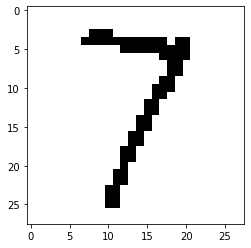

In [102]:
img = Image.open("//content/gdrive/My Drive/MNIST/seven.jpg")
img = img.convert("L")
img = np.array(img.resize((28,28)))
img = np.array(img)
img = (255.0 - img) 
img[img < 20.0] = 0
img[img > 20.0] = np.max(img)
img = img /255.0 * 0.99 + 0.01
#plt.figure()
plt.pyplot.imshow(img,cmap='Greys',interpolation='None')
#print(img)

In [103]:
np.argmax(model.predict(img[np.newaxis,...,np.newaxis]))
#model.predict(img[np.newaxis,...,np.newaxis])

7

In [104]:
#The following additions to the code are to draw bounding boxes around the digits so that we can get them as close as possible to the MNIST dataset
import cv2

In [105]:
image = cv2.imread("//content/gdrive/My Drive/MNIST/Numbers_1.jpg") #load the image file
img = image.copy()
k1 = np.ones((5,5))
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, k1, iterations = 5)
image = cv2.medianBlur(image,5)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY) #Convert it into grayscale
_, thresh = cv2.threshold(grey.copy(),150,255,cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [106]:
#print(contours) #all possible candidates for contours
print(np.size(contours))

8


7
8
9
5
4
5
3
2


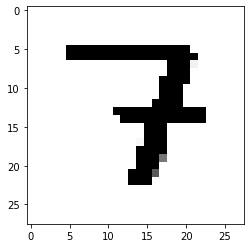

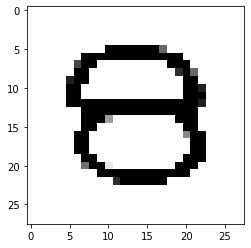

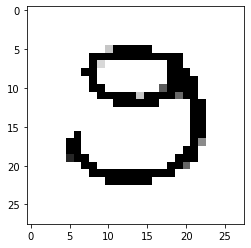

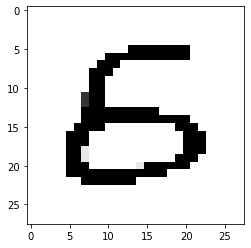

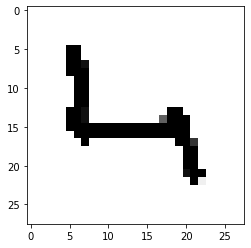

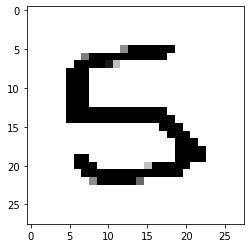

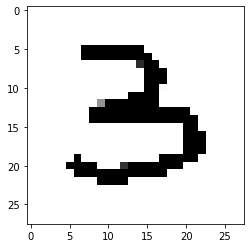

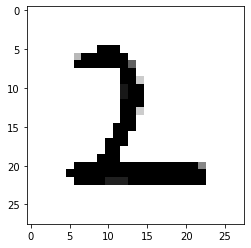

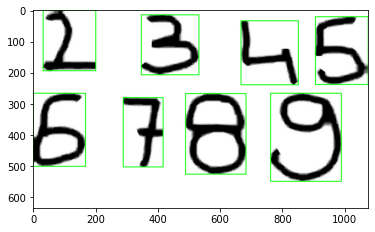

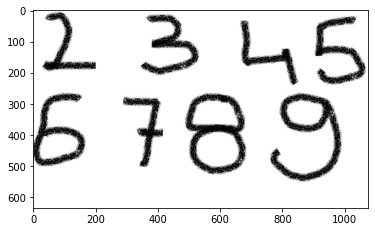

In [107]:
preprocessed_digits = []
count = 0
for c in contours:
    count += 1
    x,y,w,h = cv2.boundingRect(c)
    #print(x,y,w,h)
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2) # Drawing a green box around the number.
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    #padding the resized digit with 5 pixels in each direction
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0.01)
    # Adding the preprocessed digit to the list of preprocessed digits
    padded_digit = padded_digit /255.0 * 0.99 + 0.01
    preprocessed_digits.append(padded_digit)
    plt.pyplot.figure()
    plt.pyplot.imshow(padded_digit,cmap='Greys')
    print(np.argmax(model.predict(padded_digit[np.newaxis,...,np.newaxis])))
plt.pyplot.figure()
plt.pyplot.imshow(image,cmap='Greys')
plt.pyplot.figure()
plt.pyplot.imshow(img,cmap='Greys')
#print(padded_digit)
# print(np.size(preprocessed_digits) , count)

In [ ]:
for pds in preprocessed_digits:
  plt.pyplot.figure()
  plt.pyplot.imshow(pds,cmap='Greys')
  print(np.argmax(model.predict(pds[np.newaxis,...,np.newaxis])))